<a href="https://colab.research.google.com/github/smalvar/CalculadoraAluguel-Novembro/blob/main/2.%20Limpeza%20de%20dados%20e%20EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('banco_imoveis.csv',dtype = str)
df = df.drop(['Unnamed: 0'],axis=1)

In [17]:
df.head(10)

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,R$ 7.000 /Mês,2 Quartos,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5 Banheiros,3 Vagas,276 m²,NaN,NaN
1,R$ 1.650 /Mês,2 Quartos,Rua Professor Demóstenes Batista Figueira Marq...,1 Banheiro,1 Vaga,60 m²,NaN,NaN
2,R$ 2.400 /Mês,1 Quarto,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1 Banheiro,1 Vaga,45 m²,NaN,NaN
3,R$ 1.900 /Mês,2 Quartos,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1 Banheiro,1 Vaga,42 m²,NaN,NaN
4,R$ 1.900 /Mês,2 Quartos,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3 Banheiros,1 Vaga,84 m²,NaN,NaN
5,R$ 1.900 /Mês,1 Quarto,"Rua Adolfo Gordo, 52 - Campos Elíseos, São Pau...",1 Banheiro,1 Vaga,37 m²,NaN,NaN
6,R$ 3.400 /Mês,2 Quartos,"Rua Caconde, 310 - Jardim Paulista, São Paulo ...",2 Banheiros,1 Vaga,130 m²,NaN,NaN
7,R$ 3.400 /Mês,2 Quartos,"Rua Oscar Caravelas, 280 - Sumarezinho, São Pa...",2 Banheiros,2 Vagas,88 m²,NaN,NaN
8,R$ 4.200 /Mês,2 Quartos,"Rua Helena, 52 - Vila Olímpia, São Paulo - SP",2 Banheiros,1 Vaga,60 m²,NaN,NaN
9,R$ 2.500 /Mês,1 Quarto,"Avenida Vereador José Diniz, 3100 - Santo Amar...",1 Banheiro,1 Vaga,35 m²,NaN,NaN


In [18]:
df['bairro'] = df.endereco.str.split('\s-').str[1]
df['rua'] = df.endereco.str.split('\s-').str[0]
df['bairro'] = df.bairro.str.split(',').str[0]

df.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,R$ 7.000 /Mês,2 Quartos,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5 Banheiros,3 Vagas,276 m²,Campo Belo,"Rua Volta Redonda, 757"
1,R$ 1.650 /Mês,2 Quartos,Rua Professor Demóstenes Batista Figueira Marq...,1 Banheiro,1 Vaga,60 m²,Cambuci,Rua Professor Demóstenes Batista Figueira Marq...
2,R$ 2.400 /Mês,1 Quarto,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1 Banheiro,1 Vaga,45 m²,Cerqueira César,"Rua Cristiano Viana, 463"
3,R$ 1.900 /Mês,2 Quartos,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1 Banheiro,1 Vaga,42 m²,Bom Retiro,"Rua Afonso Pena, 560"
4,R$ 1.900 /Mês,2 Quartos,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3 Banheiros,1 Vaga,84 m²,Vila Mascote,"Rua Araquém, 19"


In [19]:
df.columns

Index(['aluguel', 'quartos', 'endereco', 'banheiro', 'vaga', 'area', 'bairro',
       'rua'],
      dtype='object')

In [20]:
all_columns = list(df)
df[all_columns] = df[all_columns].astype(str)

In [21]:
df.dtypes

aluguel     object
quartos     object
endereco    object
banheiro    object
vaga        object
area        object
bairro      object
rua         object
dtype: object

In [22]:
df['area'] = df['area'].str.extract('(.*) m²')
df['vaga'] = df['vaga'].str.extract('(.*) Vaga')
df['banheiro'] = df['banheiro'].str.extract('(.*) Banheiro')
df['quartos'] = df['quartos'].str.extract('(.*) Quarto')
df['aluguel'] = df['aluguel'].str.extract('R\$ (.*) /Mês')
df['aluguel'] = df['aluguel'].replace('\.', '', regex=True)
df.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,7000,2,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5,3,276,Campo Belo,"Rua Volta Redonda, 757"
1,1650,2,Rua Professor Demóstenes Batista Figueira Marq...,1,1,60,Cambuci,Rua Professor Demóstenes Batista Figueira Marq...
2,2400,1,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1,1,45,Cerqueira César,"Rua Cristiano Viana, 463"
3,1900,2,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1,1,42,Bom Retiro,"Rua Afonso Pena, 560"
4,1900,2,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3,1,84,Vila Mascote,"Rua Araquém, 19"


In [23]:
df['endereco'].nunique()

997

In [24]:
df = df.drop_duplicates(subset=['endereco','aluguel'], keep='first', inplace=False)

In [25]:
df.shape

(1126, 8)

In [26]:
df.to_csv('limpo.csv')

In [27]:
df.describe()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
count,1126,1126,1126,1126,1126,1126,1126,1126
unique,244,11,997,12,20,315,268,943
top,1500,1,"Avenida Moema, 177 - Moema, São Paulo - SP",1,1,30,SP,"Avenida Moema, 177"
freq,40,335,8,458,393,34,157,8


In [28]:
cols = df.columns.drop(['endereco','bairro','rua'])

In [29]:
cols

Index(['aluguel', 'quartos', 'banheiro', 'vaga', 'area'], dtype='object')

In [30]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 1137
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aluguel   1126 non-null   int64  
 1   quartos   1096 non-null   float64
 2   endereco  1126 non-null   object 
 3   banheiro  1119 non-null   float64
 4   vaga      914 non-null    float64
 5   area      1126 non-null   int64  
 6   bairro    1126 non-null   object 
 7   rua       1126 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 79.2+ KB


In [32]:
df.describe()

,aluguel,quartos,banheiro,vaga,area
count,1126.000000,1096.000000,1119.000000,914.000000,1126.000000
mean,7511.968917,2.457117,2.609473,2.841357,193.396980
std,11762.505833,1.343336,1.867800,3.358792,243.359103
min,500.000000,1.000000,1.000000,1.000000,0.000000
25%,1868.000000,1.000000,1.000000,1.000000,45.000000
50%,3300.000000,2.000000,2.000000,2.000000,96.000000
75%,8000.000000,3.000000,4.000000,4.000000,250.000000
max,110000.000000,11.000000,11.000000,40.000000,2000.000000


In [33]:
min(df.aluguel)

500

In [34]:
df.head(20)

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,7000,2.0,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5.0,3.0,276,Campo Belo,"Rua Volta Redonda, 757"
1,1650,2.0,Rua Professor Demóstenes Batista Figueira Marq...,1.0,1.0,60,Cambuci,Rua Professor Demóstenes Batista Figueira Marq...
2,2400,1.0,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1.0,1.0,45,Cerqueira César,"Rua Cristiano Viana, 463"
3,1900,2.0,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1.0,1.0,42,Bom Retiro,"Rua Afonso Pena, 560"
4,1900,2.0,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3.0,1.0,84,Vila Mascote,"Rua Araquém, 19"
5,1900,1.0,"Rua Adolfo Gordo, 52 - Campos Elíseos, São Pau...",1.0,1.0,37,Campos Elíseos,"Rua Adolfo Gordo, 52"
6,3400,2.0,"Rua Caconde, 310 - Jardim Paulista, São Paulo ...",2.0,1.0,130,Jardim Paulista,"Rua Caconde, 310"
7,3400,2.0,"Rua Oscar Caravelas, 280 - Sumarezinho, São Pa...",2.0,2.0,88,Sumarezinho,"Rua Oscar Caravelas, 280"
8,4200,2.0,"Rua Helena, 52 - Vila Olímpia, São Paulo - SP",2.0,1.0,60,Vila Olímpia,"Rua Helena, 52"
9,2500,1.0,"Avenida Vereador José Diniz, 3100 - Santo Amar...",1.0,1.0,35,Santo Amaro,"Avenida Vereador José Diniz, 3100"


In [35]:
df.isnull().sum()

aluguel       0
quartos      30
endereco      0
banheiro      7
vaga        212
area          0
bairro        0
rua           0
dtype: int64

In [36]:
df = df.fillna(0)
df.isnull().sum()

aluguel     0
quartos     0
endereco    0
banheiro    0
vaga        0
area        0
bairro      0
rua         0
dtype: int64

C:\Users\tacio\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


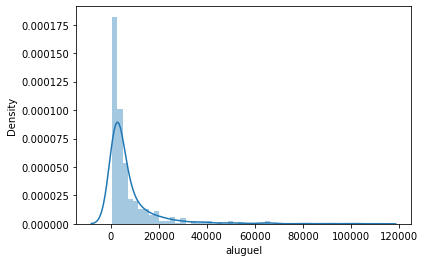

In [38]:
import seaborn as sns
sns.distplot(df['aluguel']);

<AxesSubplot:>

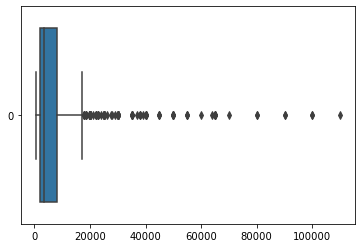

In [39]:
sns.boxplot(data = df['aluguel'], orient='horizontal')

Text(0, 0.5, 'Aluguel')

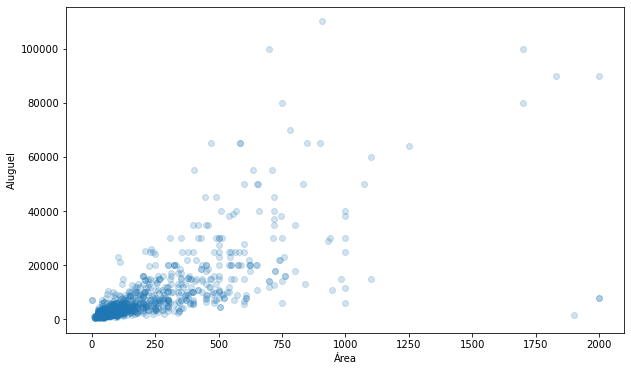

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['aluguel'], alpha=0.2)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('Área')
plt.ylabel('Aluguel')

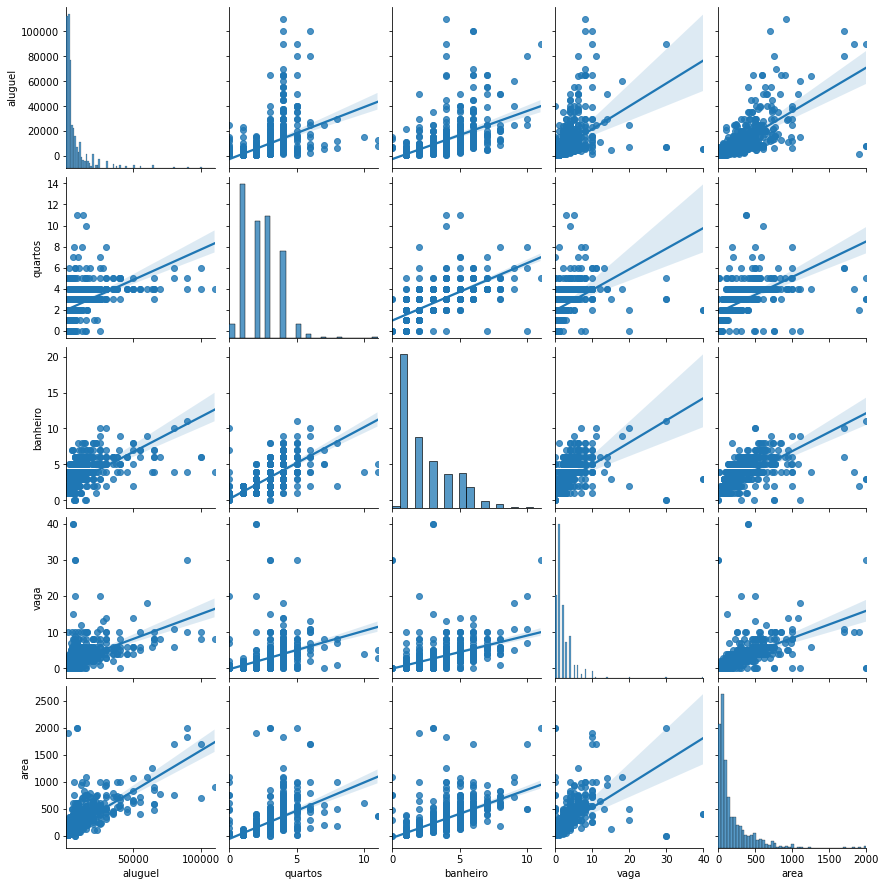

In [41]:
sns.pairplot(df, kind='reg')

In [44]:
df.corr()

,aluguel,quartos,banheiro,vaga,area
aluguel,1.000000,0.490851,0.614093,0.503130,0.727321
quartos,0.490851,1.000000,0.737378,0.455932,0.594574
banheiro,0.614093,0.737378,1.000000,0.531030,0.687037
vaga,0.503130,0.455932,0.531030,1.000000,0.570407
area,0.727321,0.594574,0.687037,0.570407,1.000000


<AxesSubplot:>

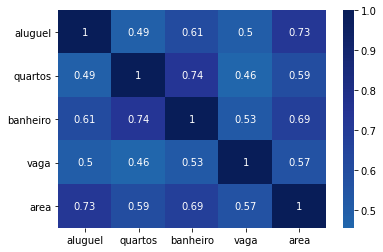

In [46]:
sns.heatmap(df.corr(), annot=True, center=0, cmap="YlGnBu")

<AxesSubplot:>

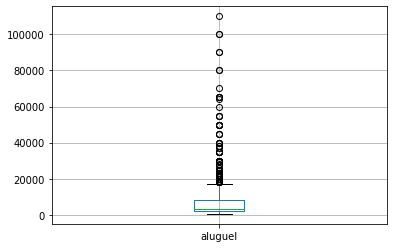

In [ ]:
df.boxplot('aluguel')

<AxesSubplot:xlabel='bairro', ylabel='aluguel'>

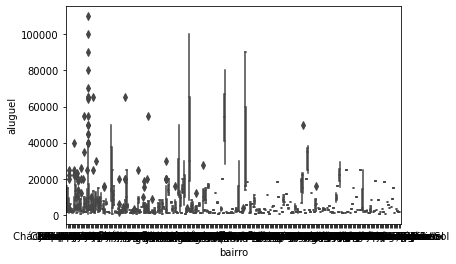

In [ ]:
sns.boxplot(x='bairro', y='aluguel', data=df)

In [ ]:
centro = ['Centro','Bela Vista','Bom Retiro','Cambuci','Consolação','Vila Monumento','Luz',
          'Higienópolis','Liberdade','República','Santa Cecília','Sé','Paraíso','Santa Efigênia',
         'Aclimação','Campos Eliseos','Campos Elíseos','Cerqueira César','Planalto Paulista',
         'Vila Monte Alegre','Vila Buarque','Jardim da Glória','Vila Moinho Velho']

norte = ['Norte','Anhanguera','Brasilândia','Casa Verde','Cachoeirinha','Freguesia do Ó','Jaçanã','Jaraguá',
    'Limão','Mandaqui','Perus','Pirituba','Santana','São Domingos','Tremembé','Tucuruvi','Vila Maria','Vila Iório',
    'Vila Medeiros','Vila Guilherme','Jardim Peri Peri','Vila Constança','City América','Jardim Yara',
        'Vila Paulistana','Sitio Botuquara','Jardim Shangrila','Jardim Franca','Vila Isolina Mazzei','Chora Menino',
        'Vila Zat','Água Fria','Jardim Japão','Vila Mangalot','Vila Carbone','Sítio Botuquara','Horto Florestal',
        'Vila Nova Mazzei','Imirim','Jardim São Paulo','Vila Libanesa','Vila Americana','Parque São Luís',
        'Lauzane Paulista','Vila Palmeiras','Vila Ede','Vila Prado']

sul = ['Sul','Campo Belo','Campo Limpo','Capão Redondo','Cidade Ademar','Cidade Dutra','Cursino','Grajaú',
    'Itaim Bibi','Ipiranga','Jabaquara' ,'Jardim Ângela' ,'Jardim São Luís','Marsilac', 'Moema',
    'Moema Pássaros','Moema Índios','Morumbi','Parelheiros','Pedreira','Sacomã','Jardim Avenida',
    'Santo Amaro','Socorro','Saúde','Vila Andrade','Vila Mariana','Vila Olímpia','Vila Mascote','Brooklin',
       'Vila Gumercindo','Vila Cruzeiro','Vila Gertrudes','Vila Arriete','Parque Colonial','Vila Clementino',
       'Vila Sofia','Vila Uberabinha','Jardim Dom Bosco','Jardim Aeroporto','Vila Congonhas','Indianópolis',
       'Brooklin Novo','Brooklin Paulista','Cidade das Monções','Cidade Monções','Jardins','Vila Nova Conceição',
      'Chácara Inglesa','Vila Santa Maria','Balneário Mar Paulista','Ferreira','Jardim Prudência','Chácara Flora',
      'Vila Tramontano','Jardim Hípico','Chácara Nossa Senhora do Bom Conselho','Cidade Domitila','Vila Castelo',
       'Chácara Santo Antônio','Jardim das Acacias','Vila Santo Estéfano','Alto Da Boa Vista','Parque Lagoa Rica',
      'Jardim Petrópolis','Guarapiranga','Jardim Cordeiro','Jardim dos Estados','Chácara Santa Maria',
      'Jardim das Acácias','Jardim Aurélia','Jardim Ampliação','Jardim Satélite','Interlagos','Jardim da Saude',
      'Jardim Represa','Jardim Vitória Régia','Jardim Sandra','Real Parque','Vila Dom Pedro I','Vila Guarani',
       'Chácara Vista Alegre','Vila Cordeiro','Jardim Santo Antoninho','Vila Santa Catarina','Nova Piraju',
      'Jordanópolis','Jardim Iracema','Vila Anhangüera','Vila Nair','Jardim Leonor','Chácara Bosque do Sol',
      'Vila Império','Vila Imperio','Jardim dos Lagos','Jardim Vilas Boas','Jardim Panorama','Chácara Monte Alegre',
       'Jardim Caboré','Jardim Taquaral','Praia da Lagoa','Jardim Marajoara','Paulicéia','Varginha',
       'Cidade Jardim','Jardim Francisco Mendes','Jardim Santa Tereza','Alto da Boa Vista','Parque Maria Fernandes']

leste = ['Leste','Água Rasa','Aricanduva','Artur Alvim','Belém','Brás','Cangaíba','Carrão','Cidade Líder',
    'Cidade Tiradentes','Ermelino Matarazzo','Guaianases','Itaim Paulista','Itaquera','Vila Invernada',
    'Jardim Helena','José Bonifácio','Lajeado','Mooca','Pari','Parque do Carmo','Penha','Vila Primavera',
    'Ponte Rasa','São Lucas','São Mateus','São Miguel','São Rafael','Sapopemba','Tatuapé','São João Clímaco',
         'Quarta Parada','Jardim Tietê','Vila Antonieta','Cidade Mãe do Céu','Vila Regente Feijó','Vila Antonina',
         'Chácara Belenzinho','Belenzinho','Jardim Egle','Cidade Vargas','Cidade Satélite Santa Bárbara',
    'Vila Curuçá','Vila Formosa','Vila Jacuí','Vila Matilde','Vila Prudente','Mooca','Tatuapé','Carandiru',
         'Mirandópolis','Vila Brasilina','Móoca','Jardim Anália Franco','Parque São Jorge','Sítio Pinheirinho',
        'Vila Pierina','Vila São Silvestre','Vila Ema','Parque Novo Mundo','Jardim Paraguaçu','Vila Santo Estevão',
        'Conjunto Habitacional Barreira Grande','Vila Santa Clara','Parque Savoy City','Jardim Avelino',
        'Vila Azevedo','Vila Dalila','Vila Bertioga','Jardim Popular']


oeste = ['Oeste','Alto de Pinheiros','Barra Funda','Butantã','Jaguará','Jardim Paulista','Jardim Paulistano',
    'Jardim Europa','Jardim América','Lapa','Morumbi','Perdizes','Pinheiros','Raposo Tavares','Rio Pequeno'
    'Vila Leopoldina','Vila Madalena','Vila Sônia','Sumarezinho','Sumaré','Boaçava','Jardim das Vertentes',
        'Rio Pequeno','Vila Leopoldina','Panamby','Jardim Monte Kemel','Pompeia','Vila Pompéia',
         'Vila Anglo Brasileira','Vila Romana','Pacaembu','Água Branca','Jardim Guedala','Jardim Everest',
        'Vila Gomes','Jardim das Bandeiras','Jardim Umuarama','Jardim Esmeralda','Jaguaré','Jardim Bonfiglioli',
        'Vila Inah','Jardim Rizzo','Vila Suzana','Parque Ipê','Vila Indiana','Cidade São Francisco',
         'Granja Julieta','Bela Aliança','Caxingui','Vila Tiradentes','Lar São Paulo',
        'Vila Progredior','Vila São Francisco','Vila Prel','Jardim Celeste']

nenhuma = ['nenhuma']

In [ ]:
bairros = nenhuma + sul + oeste + norte + sul + centro + leste

In [ ]:
def checarN_zona(df,lista):
    df = df[~df.endereco.str.contains('|'.join(bairros))]
    df['zona'] = str(lista[0])
    return df

In [ ]:
df7 = checarN_zona(df,bairros)

In [ ]:
df7.shape

(0, 9)

In [ ]:
def checar_zona(df,lista):
    df = df[df.endereco.str.contains('|'.join(lista))]
    df['zona'] = str(lista[0])
    return df

In [ ]:
df1 = checar_zona(df,oeste)
df1.shape

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(281, 9)

In [ ]:
df2 = checar_zona(df,sul)
df3 = checar_zona(df,leste)
df4 = checar_zona(df,centro)
df5 = checar_zona(df,norte)

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_concat = pd.concat([df1,df2,df3,df4,df5,df7])

In [ ]:
df_concat.shape

(1186, 9)

In [ ]:
df_final = df_concat.drop_duplicates(subset=['endereco','aluguel'], keep='last', inplace=False)

In [ ]:
df_final.shape

(1098, 9)

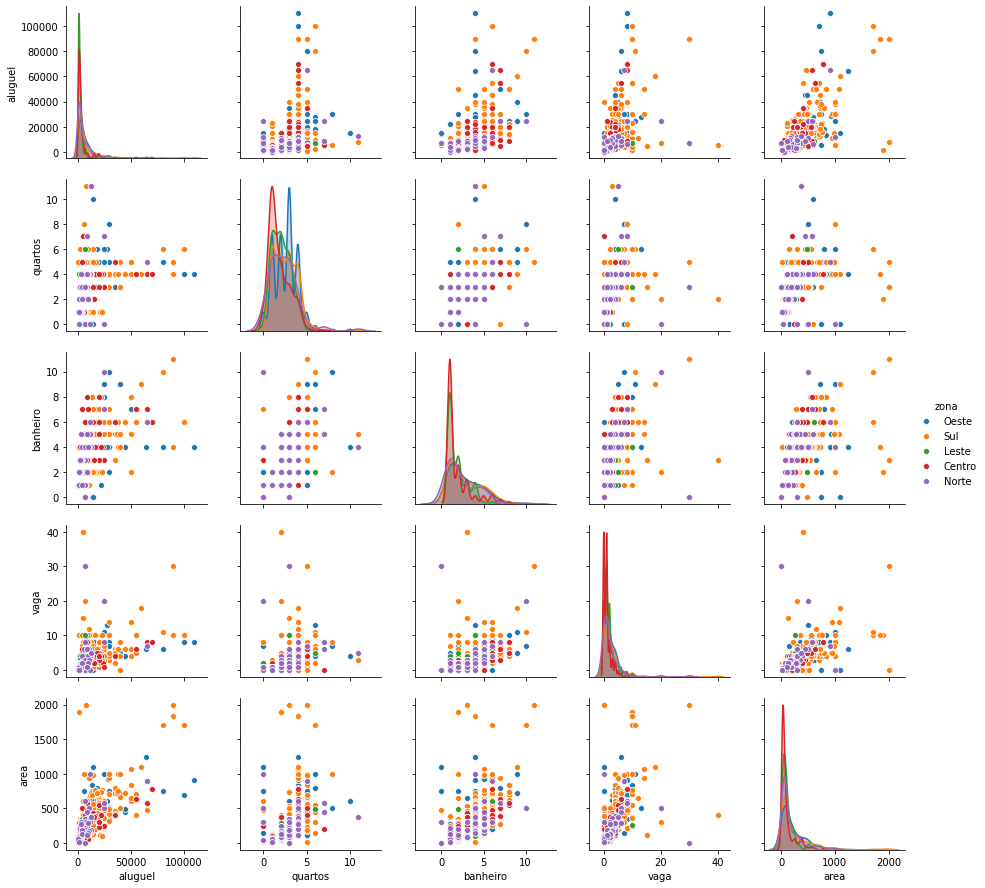

In [ ]:
sns.pairplot(df_final,hue='zona')

<AxesSubplot:xlabel='zona', ylabel='aluguel'>

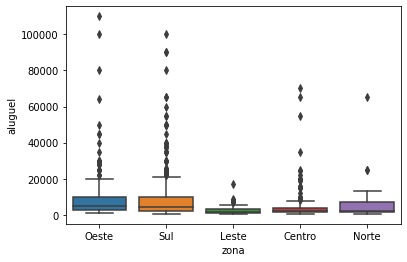

In [ ]:
sns.boxplot(x='zona', y='aluguel', data=df_final)

In [ ]:
df_final.describe()

,aluguel,quartos,banheiro,vaga,area
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,7412.638434,2.374317,2.581056,2.285064,191.764117
std,11628.341855,1.376703,1.863942,3.232382,243.575785
min,500.000000,0.000000,0.000000,0.000000,0.000000
25%,1864.000000,1.000000,1.000000,1.000000,45.000000
50%,3275.000000,2.000000,2.000000,1.000000,94.500000
75%,8000.000000,3.000000,4.000000,3.000000,250.000000
max,110000.000000,11.000000,11.000000,40.000000,2000.000000
